## Task 3
### 1. Register at kaggle.com (largest online community of data scientists, feel free to explore it)
### 2. Download the train.csv from <a href="https://www.kaggle.com/c/titanic" title="https://www.kaggle.com/c/titanic">https://www.kaggle.com/c/titanic</a> (beginner exercise to get started with ML)
### 3. Clean and prepare the data for modeling (use what you learned from the previous exercise, explain any changes you had to make for modeling)
### 4. Split the data into training and testing (explain why we do this):
    
* Data in our dataset is labeled, new data will be unknown.
* Avoiding the phenomena of “overfitting” (it means that is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data).
* The volume of the testing group is usually 1/5 from the original dataset.
* Problems with a small dataset:
    * it is problem to prevent overfitting and therefore the small group is divided into testing and training groups multiple times.
    
### 5. Explain Logistic Regression:
* __Overview:__
    * Logistic regression is one of the simplest and most used machine learning algorithms for class classification – in our case: how big is the probability that a person will survive based on characteristic as sex, age, purchased ticket, etc…
* __Math behind Logistic Regression:__
     * Comparison of Linear Regression with the Logistic Regression:
        * __Linear Regression:__
            * We use linear regression to predict the dependent variable on the independent variable, e.g., we have 5 mice, and we know their weight and size (the red points in the graph in the picture below). And we want to predict how big will be the sixth mouse if we know what her weight is. Notice the independent variable is weight and the dependent variable is the size of the mouse in our case.
            * To gain this value (or if you want prediction) we have to do three main things: Firstly, calculate the $R^2$ and determine if the weight and size are correlated. Then calculate a p-value to determine if the $R^2$ value is statistically significant and then use the line to predict the size given weight.
            * It means that we need to interpolate the points in the graph by linear line. If we gain this line, we can predict the size given weight as it is shown in the picture below.
            <img src="https://drive.google.com/uc?export=view&id=1PQ99A7jrHeoOoRQYhYD5yAhoLDIfLt4B" width="400">
        * __Logistic Regression:__
            * Logistic regression is similar to linear regression, except logistic regression predicts whether something is true or false (instead of predicting something continuous). In our case with mice – if the mouse is obese or not.
            * And, instead of fitting a linear line to the data, logistic regression fits the sigmoid or the “S” shaped function, and the “S” curve goes from 0 (not obese) to 1 (is obese). It means that the curve tells us the probability that the mouse is obese based on its weight.
            * If we take a mouse with high weight, there is a big probability that the new mouse is obese. If we take a mouse with a medium weight there will be a 50% probability that the mouse will be obese and as a last example if we chose a mouse with low weight, it would not be obese (see the picture below).
            <img src="https://drive.google.com/uc?export=view&id=1i8IIZVU8nmzWWHyXZmvGrSVx7FyZ5ybf" width="max">
            
     * One big difference between linear regression and logistic regression is how the line is fitted to the data. With linear regression, we fit the line using “least squares”. In other words, we find the line that minimizes the sum of the squares of these residuals. We also use the residuals to calculate the R square and to compare simple models to complicated models. Logistic regression does not have the concept of residuals. Instead, it uses “maximum likelihood estimation”. We interpolate the points in the graph by “S” curves and for each of them we calculate the likelihood of the data by special formula and then we pick up the ”S” curve with the maximal value of likelihood.
     <img src="https://drive.google.com/uc?export=view&id=1e_vFByT0UL7l1v1wlRfQtZik-g_OOJ2q" width="300">
* __The basic logistic regression equation:__ 

    The basic logistic regression equation is following:
### $$ y = \dfrac{1}{1 - e^{-(w_0 + w_i x)}}, $$
    where $y$ is predicted probability of belonging to the default class, $x$ is feature vector (input variable - for the mice it was the weight but we can have more than one characteristics and therefore it is the vector and we call it feature vector in machine learning), $w_0$ is bias term, $w_i$ is weight for the feature vector $x$. 
    The right part of the formula above $\dfrac{1}{1 - e^{-(w_0 + w_i x)}}$ is prescript of the sigmoid function and $(w_0 + w_i x)$ is the linear model within the logistic regression.
    
    We have to determine the bias coefficient and weight coefficient(s) for gaining the probability of belonging to the default class.

* __Types of Logistic Regression + use cases:__
    1. Binary logistic regression: The response variable can only belong to one of two categories.
         * Use cases 
              * Spam detection – the email is spam or not
              * Draft to NHL – the hockey player will be drafted or not
              * Obese prediction – the person will be obese or not
    2.	Multinomial logistic regression: The response variable can belong to one of three or more categories and there is no natural ordering among the categories.
          * Use cases 
               * Political preferences – Suppose a political scientist wants to use the predictor variables annual income and years of education to predict the probability that an individual will vote for one of the presidential candidates.
    3.	Ordinal logistic regression: The response variable can belong to one of three or more categories and there is a natural ordering among the categories.
          * Use cases 
               * Olympic medals - Suppose a bookmaker wants to use the variables age, height, and nationality to predict the probability that an individual athlete wins a gold medal in an Olympic sport.
               * Movie rating – Suppose a movie critic wants to use the predictor variables total run time and (the genre to predict the probability that a given movie will be receiving a rating between 1 and 10.

* __Logistic regression assumptions:__
    1. Dependent variable has to be binary
    2. Observations have to be independent of each other
    3. Absence of multicollinearity
    4. Linearity of independent variables and log likelihood
* __Best practices:__
    * Big data set and balanced data set (data set with normal distribution).
    * Simple model - it is good to have the simplest model as possible because we want to prevent unexpected behavior.

### 6. Create a LR model to predict who survived (a simple model using scikit-learn, feel free to try out different libraries as well)
I deal with the data set according the youtube tutorial:  <a href="https://www.youtube.com/watch?v=fATVVQfFyU0" title="https://www.youtube.com/watch?v=fATVVQfFyU0">https://www.youtube.com/watch?v=fATVVQfFyU0</a> and <a href="https://www.youtube.com/watch?v=9koIuiYqjBU" title="https://www.youtube.com/watch?v=9koIuiYqjBU">https://www.youtube.com/watch?v=9koIuiYqjBU</a>.


In [1]:
# I deal with the data set according the youtube tutorial: https://www.youtube.com/watch?v=fATVVQfFyU0.
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import re
import json
import seaborn as sns
import sklearn #scikit learn library for machine learning

In [2]:
file_name = 'train.csv'
try:
    sheet = pd.read_csv(file_name,header=0,encoding='utf-8') # key is PassengerId
except FileNotFoundError:
    print('The csv file %s has not been found.' %file_name)

In [3]:
sheet

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


C:\Users\VeronikaČížekMártono\AppData\Local\Temp\ipykernel_10948\1576733875.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sheet.corr(),cmap="YlGnBu")


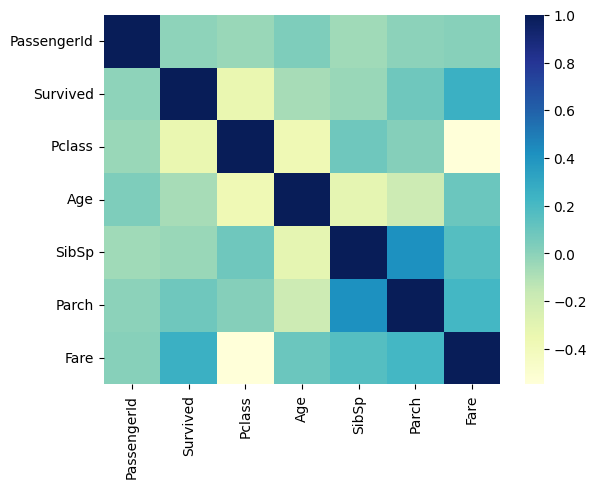

In [4]:
# looking for the positive and negative correlation in the data
sns.heatmap(sheet.corr(),cmap="YlGnBu")
plt.show()

In [5]:
# spliting the data into training and testing data - I do almost as a first thing because I dont want to be biased. 
# We use the function StratifiedShuffleSplit to gain the balanced training dataset (data set with balanced classes)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2)
for train_indices, test_indices in split.split(sheet,sheet[["Survived","Pclass","Sex"]]):
    strat_train_set = sheet.loc[train_indices]
    strat_test_set = sheet.loc[test_indices]

In [6]:
#1. check - the volume of training and testing group:
print ("The train group from train data set:",strat_train_set.shape)
print ("The test group from train data set:",strat_test_set.shape)
print ("The original train data set:",sheet.shape)

The train group from train data set: (712, 12)
The test group from train data set: (179, 12)
The original train data set: (891, 12)


In [7]:
#2. check - we can see that the testing data set is mixed
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S


<AxesSubplot: >

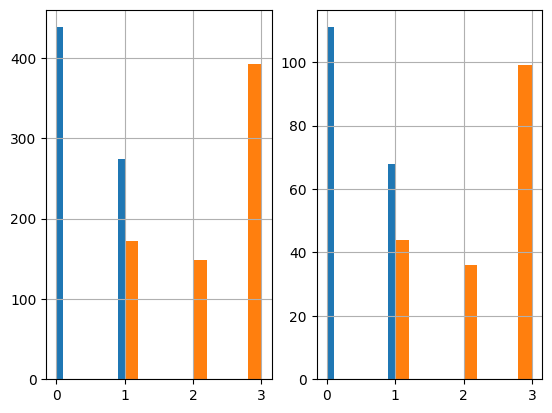

In [8]:
#2. check - it is good to look to the distribution of training and testing groups-from the charts we see that the distribution is similar
plt.subplot(1,2,1)
strat_train_set["Survived"].hist() ## blue bars
strat_train_set["Pclass"].hist() ## orange bars
#strat_train_set["Sex"].hist()
plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
#strat_test_set["Sex"].hist()

In [9]:
# 1. problem:
# from the info we can see that we are missing some age value - we have to deal with it and we are missing a lot of cabin values

strat_train_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 136 to 838
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
# dealing with the missing age data - replacing the null values with the means value
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer ## for the null values - we will input the cell with some value (in uor case mean)
class AgeImputer(BaseEstimator,TransformerMixin):
    
    def fit(self,x,y=None):
        return self
    
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        X["Fare"] = imputer.fit_transform(X[["Fare"]])
        return X

In [11]:
# usually we need the strings replace by binary numbers (e.g. "sex", "Embarked" ) --> we dont want to have C, S, Q but we want to have 
# three new columns C,S,Q with values 0 or 1
# I do it to construct the feature vector which should contain the numeric values. It means I encode e.g. string values

from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X):
        encoder = OneHotEncoder()
        
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        column_names = ["C","S", "Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i] #swaping the axes
        
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        column_names = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i] #swaping the axes
            
        return X    

In [12]:
# the last class prepared to deal with the data is the dropper. 
class FeatureDropper(BaseEstimator,TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self,X):
        return X.drop(["Embarked", "Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")

In [13]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder",FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])
                    

### Processing of Training data (training group)

In [14]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [15]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
136,137,1,1,19.000000,0,2,26.2833,0.0,0.0,1.0,1.0,0.0
276,277,0,3,45.000000,0,0,7.7500,0.0,0.0,1.0,1.0,0.0
407,408,1,2,3.000000,1,1,18.7500,0.0,0.0,1.0,0.0,1.0
168,169,0,1,29.696478,0,0,25.9250,0.0,0.0,1.0,0.0,1.0
834,835,0,3,18.000000,0,0,8.3000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
774,775,1,2,54.000000,1,3,23.0000,0.0,0.0,1.0,1.0,0.0
863,864,0,3,29.696478,8,2,69.5500,0.0,0.0,1.0,1.0,0.0
36,37,1,3,29.696478,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
427,428,1,2,19.000000,0,0,26.0000,0.0,0.0,1.0,1.0,0.0


In [16]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 136 to 838
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [17]:
# next step - we want to have numpy array from the df, so we transform them:
from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop(["Survived"],axis=1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
X_data_train_set = scaler.fit_transform(X)
y_data_train_set = y.to_numpy()

In [18]:
# final set of feature vectors
X_data_train_set

array([[-1.21737852, -1.56828591, -0.82648564, ...,  0.6336993 ,
         1.35941164, -1.35941164],
       [-0.67124185,  0.82789342,  1.18245851, ...,  0.6336993 ,
         1.35941164, -1.35941164],
       [-0.16021397, -0.37019624, -2.06275896, ...,  0.6336993 ,
        -0.73561236,  0.73561236],
       ...,
       [-1.60747614,  0.82789342,  0.        , ..., -1.57803551,
        -0.73561236,  0.73561236],
       [-0.08219445, -0.37019624, -0.82648564, ...,  0.6336993 ,
         1.35941164, -1.35941164],
       [ 1.52110678,  0.82789342,  0.17798643, ...,  0.6336993 ,
        -0.73561236,  0.73561236]])

In [19]:
# final set of labes for each feature vector (fro each person)
y_data_train_set

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

### Processing of Training data (testing group)

In [20]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [21]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
166,167,1,1,29.709128,0,1,55.0000,0.0,0.0,1.0,1.0,0.0
311,312,1,1,18.000000,2,2,262.3750,1.0,0.0,0.0,1.0,0.0
645,646,1,1,48.000000,1,0,76.7292,1.0,0.0,0.0,0.0,1.0
204,205,1,3,18.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
661,662,0,3,40.000000,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,0,3,38.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
728,729,0,2,25.000000,1,0,26.0000,0.0,0.0,1.0,0.0,1.0
461,462,0,3,34.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
76,77,0,3,29.709128,0,0,7.8958,0.0,0.0,1.0,0.0,1.0


In [22]:
# next step - we want to have numpy array from the df, so we transform them:

X = strat_test_set.drop(["Survived"],axis=1)
y = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test_set = scaler.fit_transform(X)
y_data_test_set = y.to_numpy()

## Model LR on training data

In [23]:
# Model of Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV  
model = LogisticRegression()

model.fit(X_data_train_set, y_data_train_set)


LogisticRegression()

In [24]:
# Training data (training group)
X_train_prediction = model.predict(X_data_train_set) 
print(X_train_prediction)

[1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 

In [25]:
# Accuracy of prediction on Training data (training group)
training_data_accuracy = sklearn.metrics.accuracy_score(y_data_train_set,X_train_prediction)
print("Accuracy score of training data:",training_data_accuracy)

Accuracy score of training data: 0.7991573033707865


In [26]:
# Training data (testing group)
X_test_prediction = model.predict(X_data_test_set) 
print(X_test_prediction)

[1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


In [27]:
# Accuracy of prediction on Training data (testing group)
testing_data_accuracy = sklearn.metrics.accuracy_score(y_data_test_set,X_test_prediction)
print("Accuracy score of testing data:",testing_data_accuracy)

Accuracy score of testing data: 0.7988826815642458


### 7. Evaluate your model using the testing data
#### __A. Why do we evaluate models?__ </li>
We need to evaluate model to find out how "good" is our model and if it is possible to use it for prediction.

#### __B. Overview on different metrics with math behind them__
* Courtesy of https://www.kdnuggets.com/2022/10/classification-metrics-walkthrough-logistic-regression-accuracy-precision-recall-roc.html and https://medium.com/@nandinisekar27/logistic-regression-overview-and-its-error-metrics-8b54512ca39f and https://www.keboola.com/blog/logistic-regression-machine-learning
* __What are Classification Metrics?__
    * Classification is about predicting a label and then identifying which category an object belongs to based on different parameters. 
    * In order to measure how well our classification model is doing at making these predictions, we use classification metrics. It measures the performance of our machine learning model, giving us the confidence that these outputs can be further used in decision-making processes. 
    * The performance is normally presented in a range from 0 to 1, where a score of 1 represents perfection. 
    
* __Problems with the threshold__ 
    * If we use a range from 0 to 1 to represent the performance of our model, what happens when the value is 0.5? As we know from early math classes, if the probability is greater than 0.5, we round it up to 1 (positive) - if not, it is 0 (negative).
    * That sounds okay, but now when you are using classification models to help determine the output of real-life cases. We need to be 100% sure that the output has been correctly classified.
    * For example, logistic regression is used to detect spam emails. If the probability that the email is spam is based on the fact that it is above 0.5, this can be risky as we could potentially direct an important email into the spam folder. The want and need for the performance of the model to be highly accurate becomes more sensitive for health-related and financial tasks.
    * Therefore, using the threshold concept of values above the threshold value tend to be 1, and a value below the threshold value tends to be 0 can cause challenges.
    * Although there is the option to adjust the threshold value, it still raises the risk that we classify incorrectly. For example, having a low threshold will classify the majority of positive classes correctly, but within the positive will contain negative classes - vice versa if we had a high threshold.
    
* __Classification metrics__ 
    * __Accuracy__
         * It’s the one that’s typically used the most, especially for beginners. 
         * Accuracy is defined as the number of correct predictions over the total predictions: 
         
         $$ Accuracy = \dfrac{correct \, predictions}{total \, predictions}$$
         
         * However, we can further expand on this using these:
             * True Positive $(TP)$ - you predicted positive and it’s actually positive 
             * True Negative $(TN)$ - you predicted negative and it’s actually negative
             * False Positive $(FP)$ - you predicted positive and it’s actually negative
             * False Negative $(FN)$ - you predicted negative and it’s actually positive 
             
         * So we can say the true predictions are $TN+TP$, while the false prediction is $FP+FN$. The equation can now be redefined as:
         
         $$ Accuracy = \dfrac{TP + TN}{TP + TN + FP + FN}$$
    * __Confusion Matrix__         
         * Confusion Matrix below is used to find the amount of values which are predicted correctly & wrongly          
         <img src="https://drive.google.com/uc?export=view&id=1CCGUmwQjfe0T59pa_6g6eCkMRY3ar1Ck" width="700">
   
    * __Precision and Recall + F1 Score__
         * If we want to further test the “accuracy” in different classes where we want to ensure that when the model predicts positive, it is in fact true positive - we use precision. We can also call this Positive Prediction Value which can be defined as:
         
         $$ Precision = \dfrac{TP}{TP + FP}$$         

        * If we want to further test the “accuracy” in different classes where we want to ensure that when the model predicts negative, it actually is negative - we use recall. Recall is the same formula as sensitivity and can be defined as:
        
         $$ Recall = \dfrac{TP}{TP + FN}$$ 
     
        * Using both precision and recall are useful metrics when there is an imbalance in the observations between the two classes. For example, there are more of one class (1) and only a few of the other class (0) in the dataset.
        * In order to increase the precision of your model, you will need to have fewer $FP$ and not have to worry about the $FN$. Whereas, if you want to increase recall, you will need to have fewer $FN$ and not have to worry about the $FP$.
        * Raising the classification threshold reduces false positives - increasing precision. Raising the classification threshold reduces true positives or keeps them the same, whilst increasing false negatives or keeps them the same. - decreasing recall or keeping it constant.
        * Unfortunately, it’s not possible to have a high precision and recall value. If you increase precision, it will reduce recall - vice versa. This is known as the precision/recall tradeoff.

         * F1 Score: This is defined as Harmonic mean between Precision and Recall values
        
         $$ F1 = 2 \dfrac{Precision \,x\, Recall}{Precision \,+\, Recall}$$ 
         
    * __ROC Curve__         
         * It plots the false positive rate (x-axis) against the true positive rate (y-axis).

          $$ True \,Positive \,Rate = \dfrac{TP}{TP \,+\, FN} $$
          
          $$ False \,Positive \,Rate = \dfrac{FP}{FP \,+\, TN} $$
         * The true positive rate is also known as sensitivity, and the false positive rate is also known as the inverted specificity rate. 

          $$ Specificity = \dfrac{TN}{TN \,+\, FP} $$
 
         * If the values on the x-axis consist of smaller values, this indicates lower FP and higher TN. If the values on the y-axis consist of larger values, this indicates higher TP and lower FN.

         * The ROC presents the performance of a classification model at all classification thresholds, like this:  
         
              <img src="https://drive.google.com/uc?export=view&id=1MSzfO8sTlHry8B1t_vd3dGVo508klu-0" width="500">
              
    * __AUC ROC Curve__              
         * When it comes to the ROC curve, you may have also heard Area Under the Curve (AUC). It’s exactly what it says it is - the area under the curve. If you want to know how good your curve is, you calculate the ROC AUC score. AUC measures the performance across all possible classification thresholds.

         * The more area under the curve you have, the better - the higher the ROC AUC score. This is when the FN and FP are both at zero - or if we refer to the graph above, it’s when the true positive rate is 1 and the false positive rate is 0. 


#### __C. What kind of metrics are suitable in this case?__
* Generally, our goal is to increase the number of TP and TN, to gain better results. And what to do with False Negatives and False positives? We can approach them differently in different cases:
    * __e.g.: disease - people who were tested for cancer__:
        * __we case about False Negative__ - we gain a group of people who are not suspected of cancer but they can have cancer
        * __we do not care about False Positives__ - the result of the test is that some people are positived tested for cancer but do not have cancer - we can send them to other tests and we find out that these persons are healthy.
* When it comes to __Precision we care about lowering the FP and for recall we care about lowering the FN.__ However, there is a metric that we can use to __lower both the FP and FN - ROC curve__.


#### __D. Are you satisfied with the results? How can you improve your model?__

There are multiple methods that can be used to improve your logistic regression model.

* __Data preprocessing__
    * The greatest improvements are usually achieved with a proper data cleaning process. Logistic regression uses a linear model, so it suffers from the same issues that linear regression does. To properly prepare the data for logistic regression modeling, you need to:

        * __Remove outliers.__ Outliers will skew your model to perform less well. 
        * __Remove multicollinearity.__ Logistic regression assumes that the predictor variables (features) are not correlated with one another. Check their pairwise correlation and from the analysis, remove those variables which are highly correlated.
        * __Assert linear assumption.__ If your independent variables do not have a linear relationship with your predictor variable, you need to log transform them to reshape polynomial relationships into linear. 
        * __Assert normal distribution.__ The model assumes that the independent variables follow a Gaussian distribution. Transform your variables with log transform or BoxCox if they are not normally distributed.
    * Logistic regression has additional assumptions and needs for cleaning:

        * __Binary output variable.__ Transform your output variable into 0 or 1.
        * __Failure to converge.__ The maximum likelihood estimation model (the ‘maths’) behind logistic regression assumes that no single variable will perfectly predict class membership. In the event that you have a feature that perfectly predicts the target class, the algorithm will try to assign it infinite weights (because it is so important) and thus will fail to converge to a solution. If you have a perfect predictor, simply remove it from the feature set... or just don’t model your data at all. At the end of the day, you do not need a machine learning model if you have a perfect predictor.
* Feature scaling
    * Feature values can be comparably different by orders of magnitude. For instance, loan size is in the tens of thousands (50,000), while “number of months late” is in single digits (0, 1, 2, …).  
    * Features of different scales convert slower (or not at all) with gradient descent. 
    * Normalize and standardize your features to speed up and improve model training.
* Regularization
    * Regularization is particularly useful in settings with multiple features (or independent variables). Regularization takes a complex model (with multiple predictors) and sets their weights to zero (L1 regularization). This effectively removes a predictor from the linear equation or lowers its weights towards zero (L2 regularization), making the feature less impactful on the final logistic regression equation.
    * Both of these approaches work great when you have an overly complex model which overfits.


### Evaluation of my model

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score

Shape of CM:
True Negative || False Negative 
False Positive || True Positive


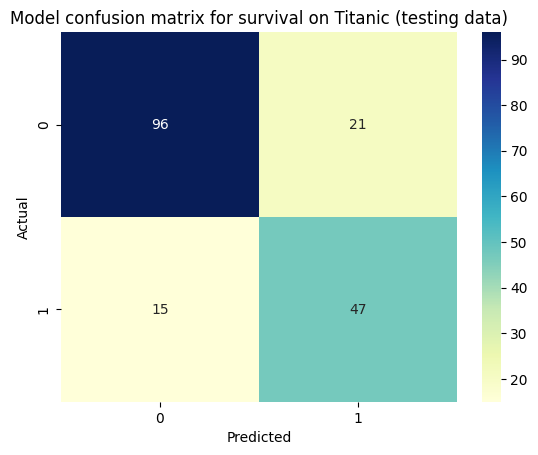

In [29]:
# Evaluation metrics - Confusion Matrix
confusion_matrix = metrics.confusion_matrix(X_test_prediction, y_data_test_set) 

sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap="YlGnBu")
plt.title("Model confusion matrix for survival on Titanic (testing data)")
plt.xlabel('Predicted')
plt.ylabel('Actual');

print("Shape of CM:\nTrue Negative || False Negative \nFalse Positive || True Positive" )

In [30]:
# Evaluation metrics 
# Accuracy
testing_data_accuracy = sklearn.metrics.accuracy_score(y_data_test_set,X_test_prediction)
print("Accuracy score of testing data:",testing_data_accuracy)

# Precision and Recall + F1 Score
print("Precision and Recall + F1 Score Report:")
print(classification_report(y_data_test_set,X_test_prediction))

    #print(sklearn.metrics.precision_recall_fscore_support(y_data_test_set,X_test_prediction))

# ROC_AUC score
from sklearn.metrics import roc_auc_score
print("ROC-AUC score:",sklearn.metrics.roc_auc_score(y_data_test_set,X_test_prediction))

Accuracy score of testing data: 0.7988826815642458
Precision and Recall + F1 Score Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.76      0.69      0.72        68

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

ROC-AUC score: 0.7780206677265501


### Processing of Final Testing data - from kaggle

In [31]:
final_testing_data = pd.read_csv("test.csv")

In [32]:
final_testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
final_testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
final_testing_data_proc = pipeline.fit_transform(final_testing_data)

In [35]:
final_testing_data_proc

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [36]:
# looking for another NaN after pipline preprocessing:
final_testing_data_proc[final_testing_data_proc["Fare"].isnull()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male


In [37]:
# index of the rows with nan determined:
final_testing_data_proc[final_testing_data_proc['Fare'].isnull()].index.tolist()

[]

In [38]:
# dropping the rows with nulls
index_fare_nan = final_testing_data_proc[final_testing_data_proc['Fare'].isnull()].index.tolist()

index_fare_nan_str = [str(x) for x in index_fare_nan]
print(index_fare_nan_str)


update_final_testing_data_proc = final_testing_data_proc.drop(index_fare_nan,axis=0)

[]


In [39]:
update_final_testing_data_proc[final_testing_data_proc["Fare"].isnull()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male


In [40]:
update_final_testing_data_proc.shape

(418, 11)

In [41]:
# next step - we want to have numpy array from the df, so we transform them:

# final testing data are not labeled, therefore we dont need to split dataset to "x" and "y" part
# X = final_testing_data_proc
# y = final_testing_data_proc["Survived"]

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(update_final_testing_data_proc)
# y_data_final_test = y.to_numpy()

In [42]:
# is there some another NULL?
np.unique(np.isnan(X_data_final_test))

array([False])

###  Final Deploy data

In [43]:
my_final_test_prediction = model.predict(X_data_final_test) 
print(my_final_test_prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [44]:
# final saving predition into csv --> for upload to kaggle :)
final_df = pd.DataFrame(final_testing_data["PassengerId"])
final_df["Survived"] = my_final_test_prediction
final_df.to_csv("prediction_LR.csv", index=False)

In [45]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
